In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
datasets = tf.keras.datasets
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
# x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
# x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = tf.keras.utils.to_categorical(y_train[:-2000])

In [18]:
x_train.shape

TensorShape([58000, 28, 28, 3])

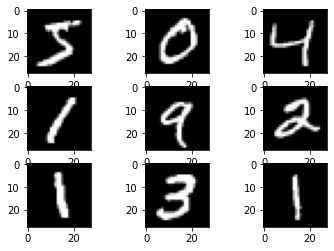

In [ ]:
import matplotlib.pyplot as plt
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)
datagen.fit(x_train)
datagen.flow(x_train, y_train, batch_size=9)

In [ ]:
import os
os.makedirs('data')

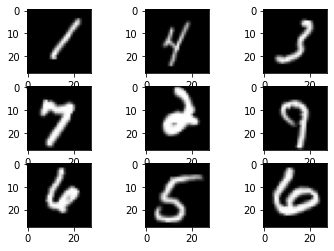

In [ ]:
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9,save_to_dir='data', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [ ]:
X_train_augmented = [image for image in x_train]
y_train_augmented = [image for image in y_train]
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)
for image, label in zip(x_train, y_train):
             X_train_augmented.append()
             y_train_augmented.append(label)


In [ ]:
# rescale: tỉ lệ lại giá trị
# zoom_range: thực hiện zoom trong một phạm vi nào đó
# rotation_range: xoay ảnh trong phạm vi
# width_shift_range: dịch theo chiều ngang trong phạm vi
# height_shift_range: dịch theo chiều dọc trong phạm vi
# brightness_range: tăng cường độ sáng trong phạm vi
# vertical_flip: lập ngẫu nhiên theo chiều dọc
# shear_range: Làm méo ảnh
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)


In [ ]:
train_datagen.fit(x_train)

In [ ]:
x_train.shape

TensorShape([58000, 32, 32, 3])

In [ ]:
# 
train_generator = train_datagen.flow_from_directory(
    directory=r"./train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
datasets = tf.keras.datasets
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, strides=1,activation='tanh',padding="same",input_shape=[28,28,3]),
    keras.layers.AvgPool2D(pool_size=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, strides=1,activation='tanh',padding="valid"),
    keras.layers.AvgPool2D(pool_size=2),
    keras.layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax')
])      

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.2)
dataGen.fit(x_train)
dataGen.fit(x_val)
train_generator = dataGen.flow(x_train, y_train, batch_size=32,
                               save_to_dir=None, subset='training')

validation_generator = dataGen.flow(x_train, y_train, batch_size=32, 
                                save_to_dir=None, subset='validation')

In [ ]:
x_train.shape

TensorShape([58000, 28, 28, 3])

In [ ]:
os.makedir("Train")
os.path.join('Train')

In [ ]:
train_generator = dataGen.flow_from_directory(
    directory="train",
    target_size=(227, 227),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 0 images belonging to 2 classes.


In [ ]:
data_floder="data"
for floder in os.listdir(data_floder):
  curr_path=os.path.join(data_floder,floder)
  for file in os.listdir(curr_path):
    curr_file=os.path.join(data_floder,file)
    image=cv2.imgread(curr_file)
    X.append(image)
    y.append(imge)